In [144]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd "/content/drive/MyDrive/DS1final/code"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DS1final/code


In [145]:
import pandas as pd
import numpy as np

In [146]:
# !ls "Dataset/final_data"

# load and merge data

load all datas

In [147]:
path = "../Dataset/final_data/"

In [148]:
grad = pd.read_csv(path + "grad_join.csv")
nces = pd.read_csv(path + "nces_finana_join.csv")
SAT = pd.read_csv(path + "SAT_join.csv")

## preprocess and merge performance data

### grad dataframe

In [149]:
print(grad.YEAR.value_counts())
print(grad.ETHNICITY.value_counts())
print(grad.CODE.value_counts())

2021    25
2019    21
Name: YEAR, dtype: int64
All    46
Name: ETHNICITY, dtype: int64
402     2
462     2
DCPS    2
884     2
478     2
474     2
471     2
467     2
466     2
464     2
436     2
463     2
459     2
458     2
457     2
456     2
455     2
454     2
452     2
450     2
442     2
465     1
950     1
861     1
1058    1
Name: CODE, dtype: int64


In [150]:
grad = grad.drop(['Unnamed: 0', 'ETHNICITY'], axis=1)
print(grad.shape)
grad.head()

(46, 5)


,CODE,SCHOOL,N_GRADS,GRAD_PERCENTAGE,YEAR
0,402,Benjamin Banneker HS,108,1.000000,2019
1,436,Ron Brown College Preparatory High School,n < 10,NaN,2019
2,442,Columbia Heights EC (CHEC),220,0.814815,2019
3,450,Anacostia HS,51,0.490385,2019
4,452,Ballou HS,152,0.582375,2019


### SAT dataframe

In [151]:
SAT.head()

,Unnamed: 0,CODE,SCHOOL,TEST_TAKERS,AVG_READING_SCORE,AVG_MATH_SCORE,AVG_TOTAL,YEAR
0,5,402,Benjamin Banneker HS,82,551,552,1104.0,2021
1,6,436,Ron Brown College Preparatory High School,2,435,405,840.0,2021
2,7,442,Columbia Heights EC (CHEC),102,425,419,845.0,2021
3,8,450,Anacostia HS,15,416,405,822.0,2021
4,9,452,Ballou HS,10,379,383,762.0,2021


In [152]:
SAT = SAT.drop(['Unnamed: 0', 'SCHOOL'], axis=1)
print(SAT.shape)
SAT.head()

(43, 6)


,CODE,TEST_TAKERS,AVG_READING_SCORE,AVG_MATH_SCORE,AVG_TOTAL,YEAR
0,402,82,551,552,1104.0,2021
1,436,2,435,405,840.0,2021
2,442,102,425,419,845.0,2021
3,450,15,416,405,822.0,2021
4,452,10,379,383,762.0,2021


## merge 2 performance data

In [153]:
performance_df = grad.merge(SAT, on=['CODE', "YEAR"], suffixes=('_grad', '_sat'))
print(performance_df.shape)
performance_df.head()

(43, 9)


,CODE,SCHOOL,N_GRADS,GRAD_PERCENTAGE,YEAR,TEST_TAKERS,AVG_READING_SCORE,AVG_MATH_SCORE,AVG_TOTAL
0,402,Benjamin Banneker HS,108,1.000000,2019,206,557,553,1110.970825
1,436,Ron Brown College Preparatory High School,n < 10,NaN,2019,57,429,410,839.298218
2,442,Columbia Heights EC (CHEC),220,0.814815,2019,371,444,428,873.288391
3,450,Anacostia HS,51,0.490385,2019,101,381,374,755.346558
4,452,Ballou HS,152,0.582375,2019,240,396,381,778.500000


## preprocess financial data

In [154]:
nces.shape

(483, 41)

In [155]:
nces.columns

Index(['Unnamed: 0', 'state', 'year', 'distid_stateassigned',
       'schoolid_stateassigned', 'distname', 'schoolname', 'ncesdistid_admin',
       'ncesdistid_geo', 'census_id', 'ncesid', 'ncesenroll', 'gradespan',
       'level', 'enroll_raw_DC', 'enrollmetric', 'pp_stloc_raw_DC',
       'pp_fed_raw_DC', 'pp_total_raw_DC', 'pp_site_stloc_raw_DC',
       'pp_site_fed_raw_DC', 'pp_site_raw_DC', 'pp_centshare_stloc_raw_DC',
       'pp_centshare_fed_raw_DC', 'pp_centshare_raw_DC', 'schoolstloc_raw_DC',
       'schoolfed_raw_DC', 'schooltot_raw_DC', 'pp_total_norm_NERDS',
       'disttotwexclu_raw_DC', 'distexclu_raw_DC', 'schtype_raw_DC',
       'ward_raw_DC', 'countenroll', 'noaudit', 'nositecen', 'adfinvars',
       'distflex', 'flag_nerds', 'flag_f33', 'month'],
      dtype='object')

In [156]:
nces_drop_cols = ['Unnamed: 0', 'state', 'census_id', 'ncesid', 'schoolname', 'adfinvars']
nces.rename(columns = {'year':'year_range'}, inplace = True)
nces = nces.drop(nces_drop_cols, axis=1)
nces.head()

,year_range,distid_stateassigned,schoolid_stateassigned,distname,ncesdistid_admin,ncesdistid_geo,ncesenroll,gradespan,level,enroll_raw_DC,...,distexclu_raw_DC,schtype_raw_DC,ward_raw_DC,countenroll,noaudit,nositecen,distflex,flag_nerds,flag_f33,month
0,2018-2019,178,233,Academy of Hope Adult PCS,NaN,NaN,NaN,NaN,NaN,463,...,721987,Charter,5,1,0,0,1,0,0,JAN
1,2018-2019,155,217,Achievement Preparatory Academy PCS,1100072.0,1100072.0,375.0,PK-03,2.0,375,...,5331797,Charter,8,1,0,0,1,0,0,JAN
2,2018-2019,155,1100,Achievement Preparatory Academy PCS,1100072.0,1100072.0,450.0,04-08,3.0,450,...,5331797,Charter,8,1,0,0,1,0,0,JAN
3,2018-2019,103,140,AppleTree Early Learning PCS,1100054.0,1100054.0,154.0,PK-PK,1.0,154,...,7363789,Charter,1,1,0,0,1,0,0,JAN
4,2018-2019,103,3072,AppleTree Early Learning PCS,1100054.0,1100054.0,90.0,PK-PK,1.0,90,...,7363789,Charter,8,1,0,0,1,0,0,JAN


the **schoolid_stateassigned** column and **CODE** column in performance data are the same find the school's intersection of the 2 data 

In [157]:
print(nces.schoolid_stateassigned.unique())
print(performance_df.CODE.unique())
nces['schoolid_stateassigned'] = nces.schoolid_stateassigned.astype(str)
public_school_ids =[str(i) for i in set(performance_df.CODE) & set(nces.schoolid_stateassigned)]
public_school_ids

[ 233  217 1100  140 3072 3073 1137 1069 3068  289  142  126 1207  184
  182 1119  188 1103 1104 1105 1106 1107 1108  153  127  109  102  216
 3069  199  276 1110  218  130  196 3070 1038  248  202  203  450  452
  462  204 1058  205  206  402  212  213  347  404  296  219  346  220
  221  247  360  454  224  442  455  405  349  231  471  467  457  232
  407  318  238  239  227  464  246  413  258  249  251  252 1071  339
  254  433  416  421  257  272  259  344  417  261  262  370  264  291
  266  271  884  420  308  273  284  274  435  458  280  285  287  288
  290  292  294  295  301  478  299  300  316  302  304  436  459  456
  305  307  409  466  175  309  313  315  322  427  319  321  428  324
  325  326  327  328  329  330  331  332  474  333  336  335  338  463
  860 1206 1138  146  195 1125  138  159 1059  269 1140  361  362  363
  364  186 1083 1084  268  113 1057 1164 1124  365  366  297  245  131
  114  115  163  200 3064  267  116  236 1123  209 1122 1129 3071 1085
  189 

['466',
 '463',
 '459',
 '402',
 '442',
 '1058',
 '464',
 '474',
 '462',
 '452',
 '456',
 '478',
 '457',
 '450',
 '471',
 '454',
 '458',
 '884',
 '455',
 '436',
 '467']

In [158]:
# subset to only intersection school
nces_ps = nces[nces.schoolid_stateassigned.isin(public_school_ids )]
print(nces.shape, nces_ps.shape)
nces_ps.head()

(483, 35) (42, 35)


,year_range,distid_stateassigned,schoolid_stateassigned,distname,ncesdistid_admin,ncesdistid_geo,ncesenroll,gradespan,level,enroll_raw_DC,...,distexclu_raw_DC,schtype_raw_DC,ward_raw_DC,countenroll,noaudit,nositecen,distflex,flag_nerds,flag_f33,month
40,2018-2019,1,450,District of Columbia Public Schools,1100030.0,1100030.0,296.0,09-12,4.0,296,...,4214636,DCPS,8,1,0,0,1,0,0,JAN
41,2018-2019,1,452,District of Columbia Public Schools,1100030.0,1100030.0,650.0,09-12,4.0,650,...,4214636,DCPS,8,1,0,0,1,0,0,JAN
42,2018-2019,1,462,District of Columbia Public Schools,1100030.0,1100030.0,322.0,09-12,4.0,524,...,4214636,DCPS (Alternative),8,1,0,0,1,0,0,JAN
44,2018-2019,1,1058,District of Columbia Public Schools,1100030.0,1100030.0,NaN,09-11,4.0,NRD,...,NRD,NRD,NRD,1,0,0,1,1,0,JAN
47,2018-2019,1,402,District of Columbia Public Schools,1100030.0,1100030.0,482.0,09-12,4.0,482,...,4214636,DCPS,1,1,0,0,1,0,0,JAN


In [159]:
nces_ps.columns

Index(['year_range', 'distid_stateassigned', 'schoolid_stateassigned',
       'distname', 'ncesdistid_admin', 'ncesdistid_geo', 'ncesenroll',
       'gradespan', 'level', 'enroll_raw_DC', 'enrollmetric',
       'pp_stloc_raw_DC', 'pp_fed_raw_DC', 'pp_total_raw_DC',
       'pp_site_stloc_raw_DC', 'pp_site_fed_raw_DC', 'pp_site_raw_DC',
       'pp_centshare_stloc_raw_DC', 'pp_centshare_fed_raw_DC',
       'pp_centshare_raw_DC', 'schoolstloc_raw_DC', 'schoolfed_raw_DC',
       'schooltot_raw_DC', 'pp_total_norm_NERDS', 'disttotwexclu_raw_DC',
       'distexclu_raw_DC', 'schtype_raw_DC', 'ward_raw_DC', 'countenroll',
       'noaudit', 'nositecen', 'distflex', 'flag_nerds', 'flag_f33', 'month'],
      dtype='object')

In [160]:
ncesps_drop_cols = nces_ps.columns[nces_ps.nunique() <= 1]
nces_ps = nces_ps.drop(ncesps_drop_cols, axis=1)

## merge all data

In [161]:
print(nces_ps.shape, performance_df.shape)

(42, 23) (43, 9)


In [162]:
final_df = performance_df.merge(nces, left_on='CODE', right_on='schoolid_stateassigned', how='outer')
print(final_df.shape)
final_df.head()

(524, 44)


,CODE,SCHOOL,N_GRADS,GRAD_PERCENTAGE,YEAR,TEST_TAKERS,AVG_READING_SCORE,AVG_MATH_SCORE,AVG_TOTAL,year_range,...,distexclu_raw_DC,schtype_raw_DC,ward_raw_DC,countenroll,noaudit,nositecen,distflex,flag_nerds,flag_f33,month
0,402,Benjamin Banneker HS,108,1.0,2019.0,206.0,557.0,553.0,1110.970825,2018-2019,...,4214636,DCPS,1,1.0,0.0,0.0,1.0,0.0,0.0,JAN
1,402,Benjamin Banneker HS,108,1.0,2019.0,206.0,557.0,553.0,1110.970825,2018-2019,...,4214636,DCPS,1,1.0,0.0,0.0,1.0,0.0,0.0,SEP
2,402,Benjamin Banneker HS,113,1.0,2021.0,82.0,551.0,552.0,1104.000000,2018-2019,...,4214636,DCPS,1,1.0,0.0,0.0,1.0,0.0,0.0,JAN
3,402,Benjamin Banneker HS,113,1.0,2021.0,82.0,551.0,552.0,1104.000000,2018-2019,...,4214636,DCPS,1,1.0,0.0,0.0,1.0,0.0,0.0,SEP
4,436,Ron Brown College Preparatory High School,n < 10,NaN,2019.0,57.0,429.0,410.0,839.298218,2018-2019,...,4214636,DCPS,7,1.0,0.0,0.0,1.0,0.0,0.0,JAN


In [163]:
!ls

'Copy of Ocean_Educ_Preprocessing.ipynb'   financial_data_combined.ipynb
'data preprocess.ipynb'			   Ocean_Educ_Preprocessing.ipynb
 final_combine_preprocess.ipynb		   Ocean_OSSEDC_STAR_EDA.ipynb


In [164]:
final_df.to_csv('../Dataset/final_data/performanceNfinancial.csv')

# preprocess

In [165]:
print(final_df.shape)
final_df.info()

(524, 44)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 523
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CODE                       83 non-null     object 
 1   SCHOOL                     83 non-null     object 
 2   N_GRADS                    83 non-null     object 
 3   GRAD_PERCENTAGE            76 non-null     float64
 4   YEAR                       83 non-null     float64
 5   TEST_TAKERS                83 non-null     float64
 6   AVG_READING_SCORE          83 non-null     float64
 7   AVG_MATH_SCORE             83 non-null     float64
 8   AVG_TOTAL                  83 non-null     float64
 9   year_range                 521 non-null    object 
 10  distid_stateassigned       521 non-null    float64
 11  schoolid_stateassigned     521 non-null    object 
 12  distname                   521 non-null    object 
 13  ncesdistid_admin           505 non-null 

In [166]:
! pip install sweetviz 
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)


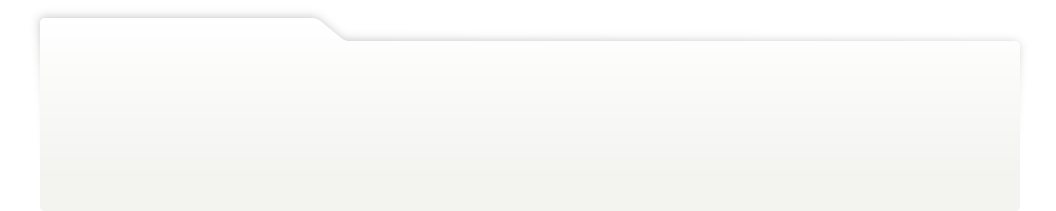
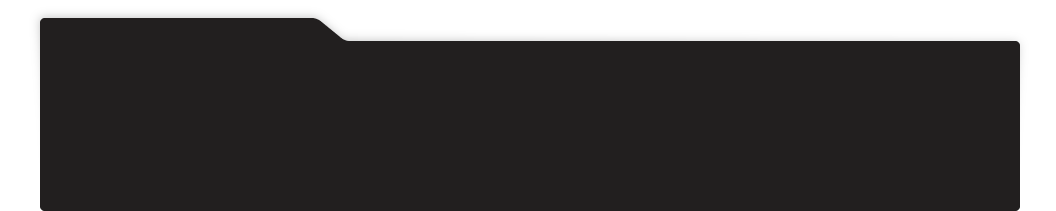
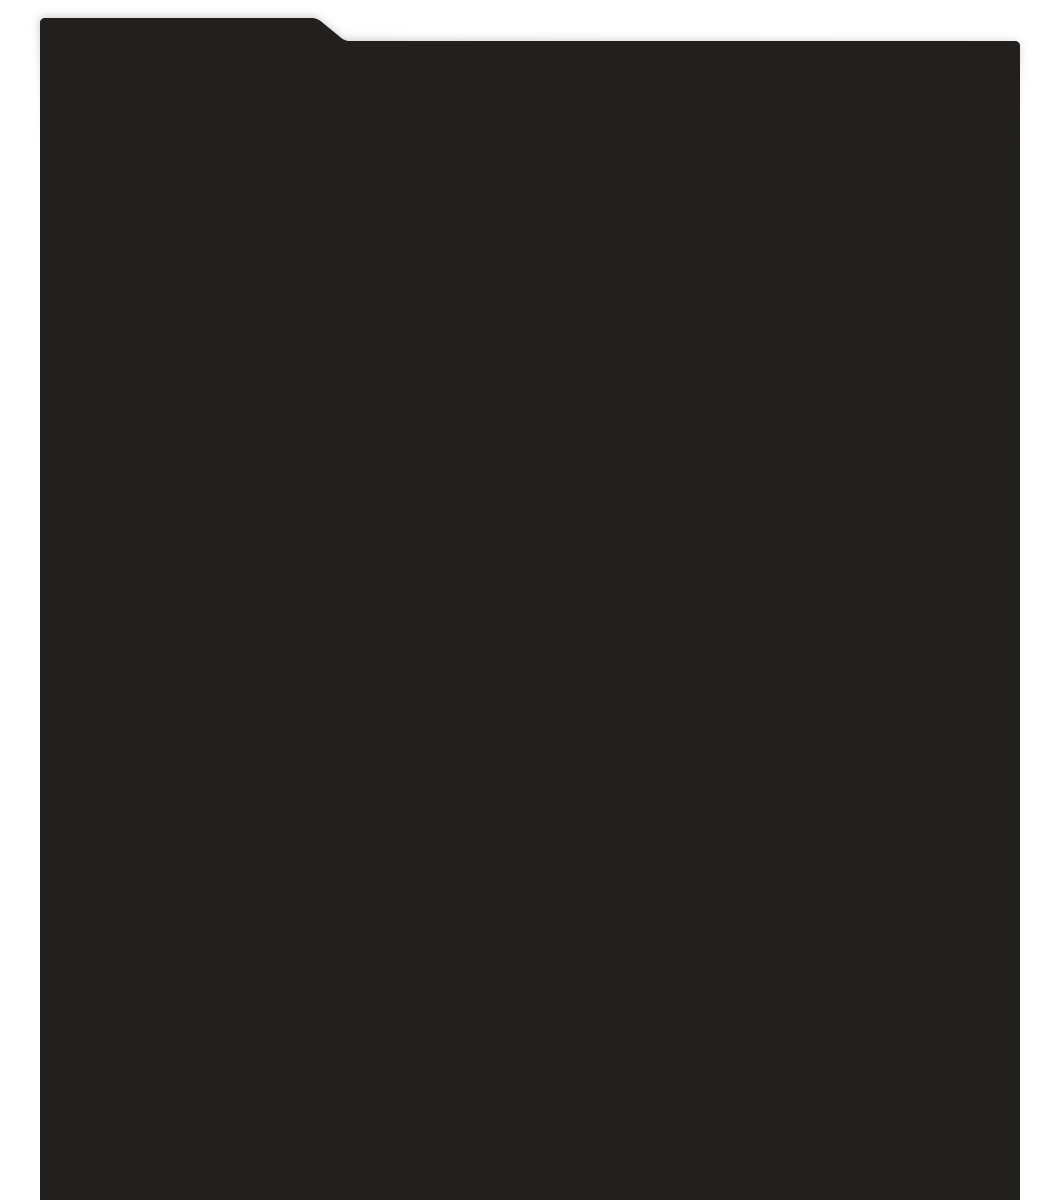
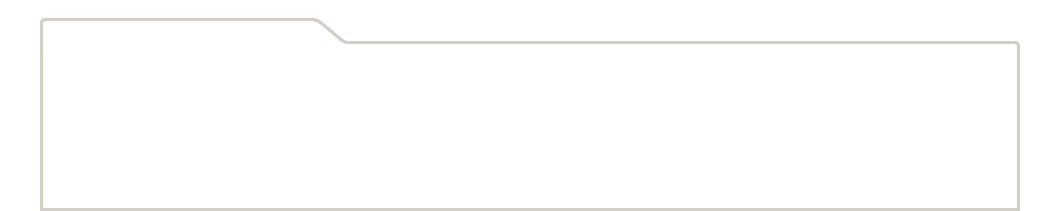
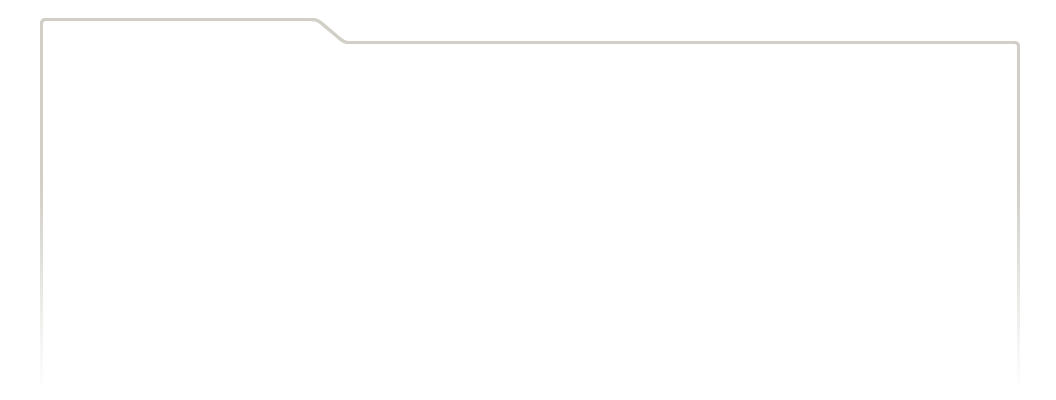
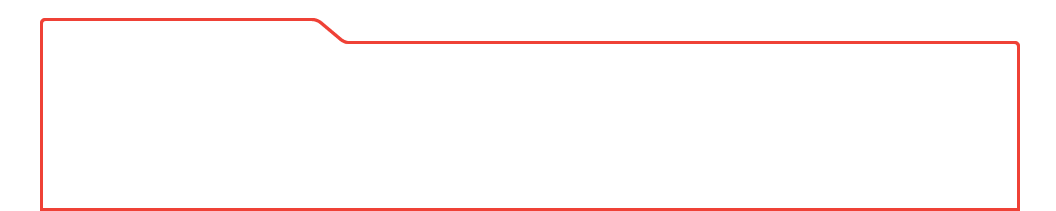
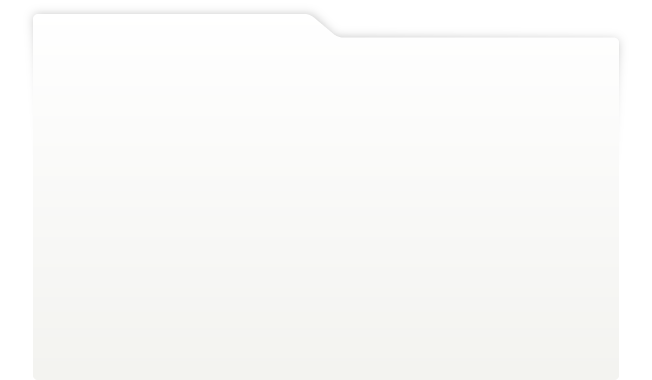
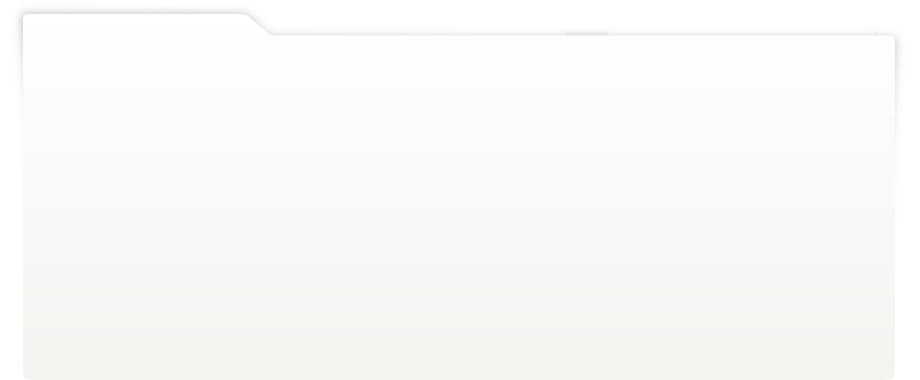
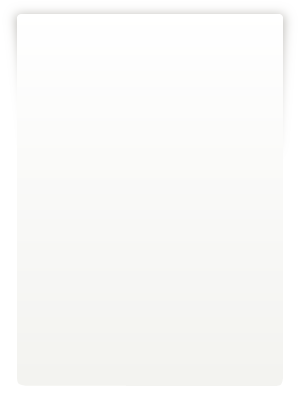
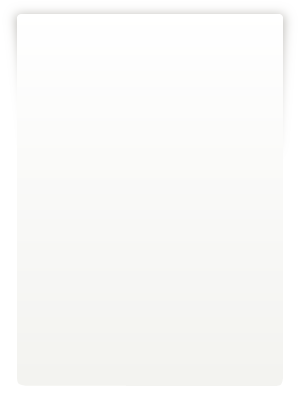
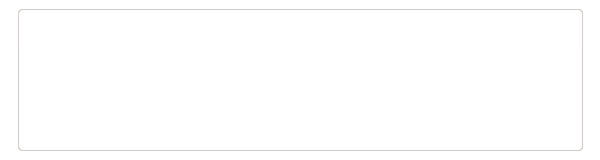
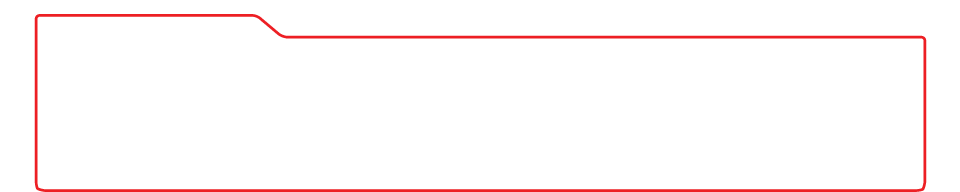
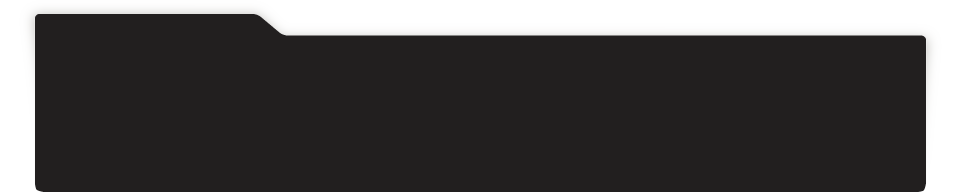
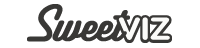
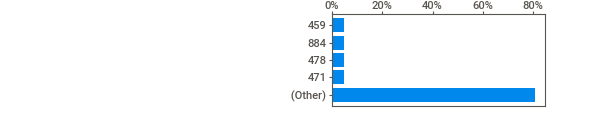
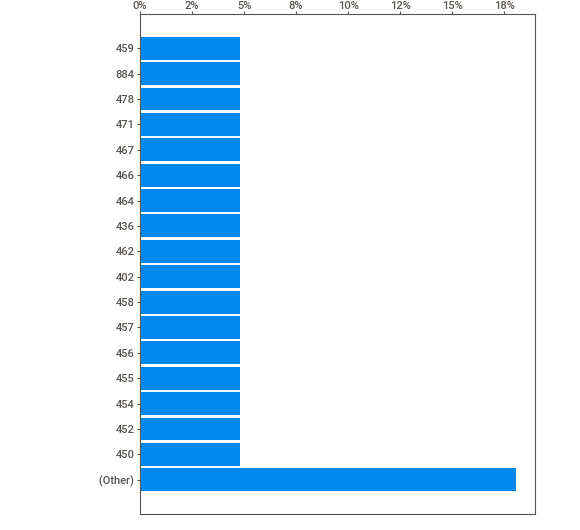
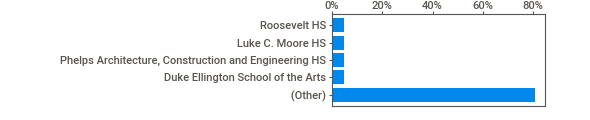
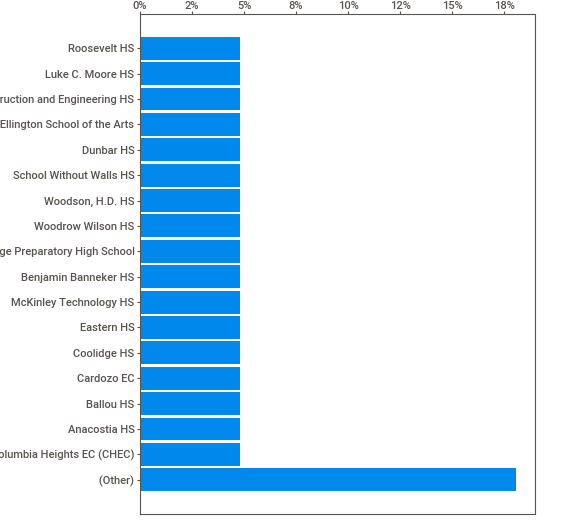
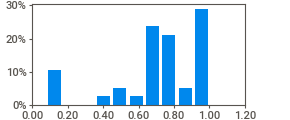
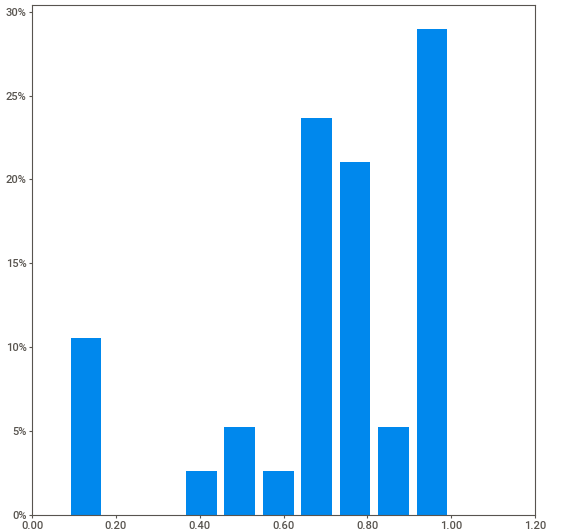
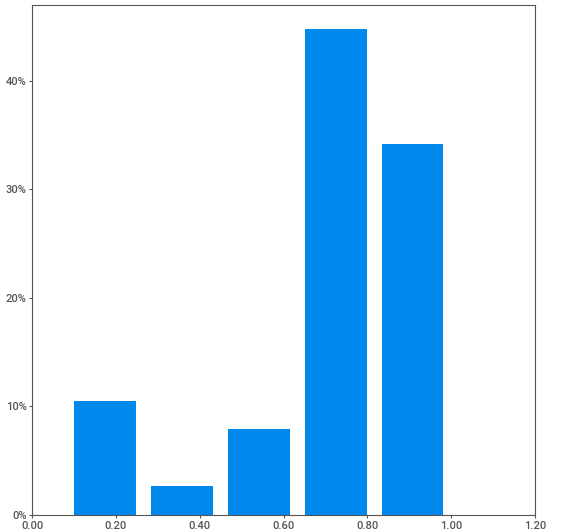
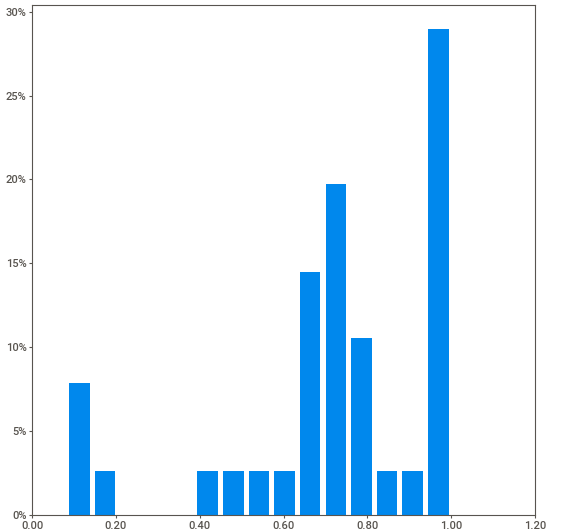
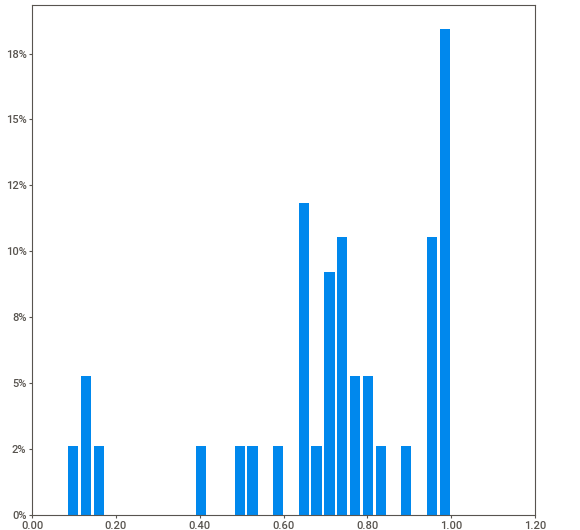
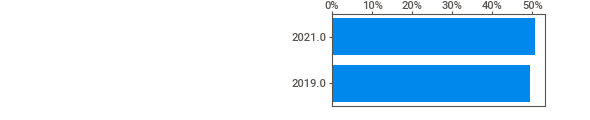
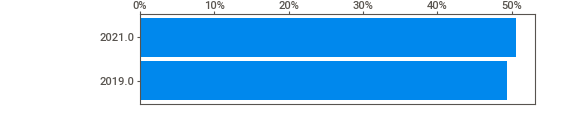
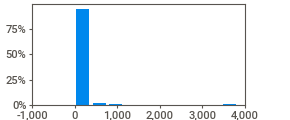
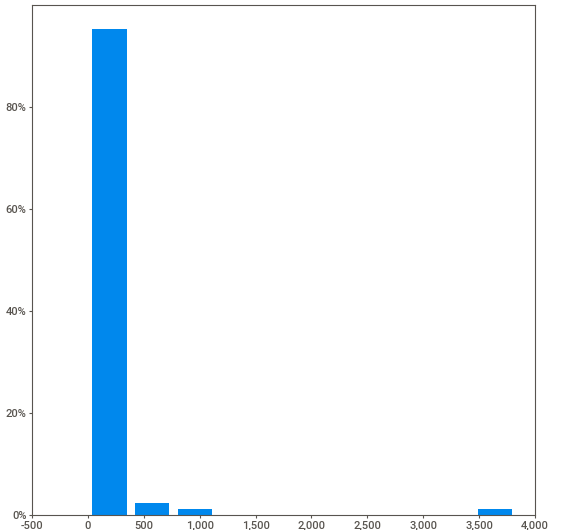
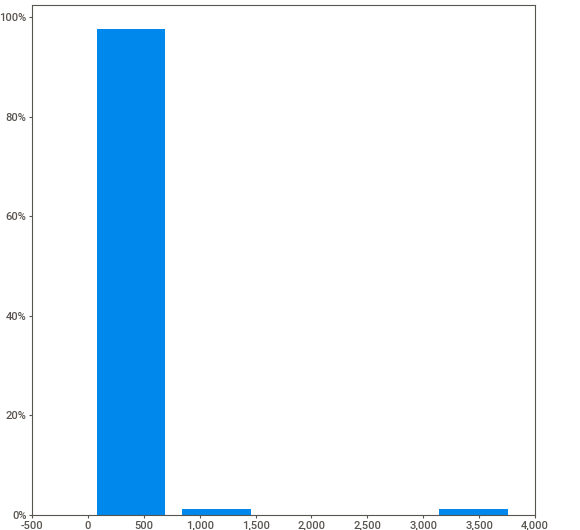
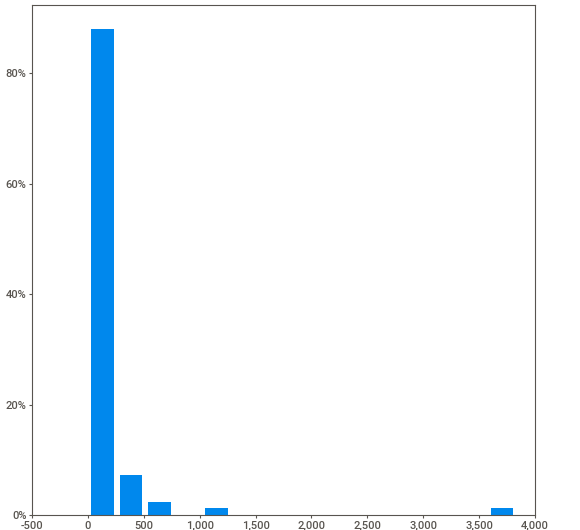
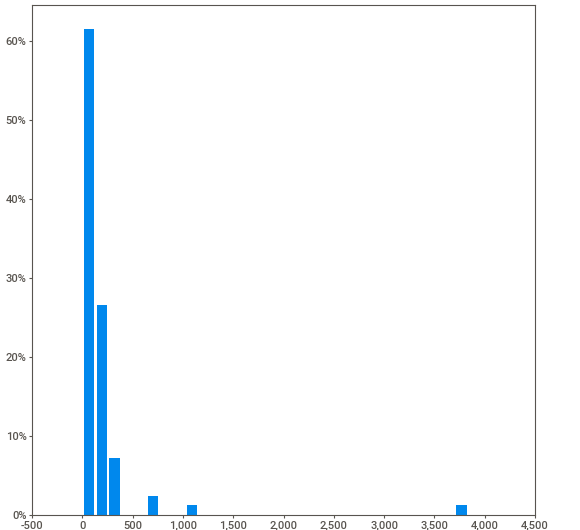
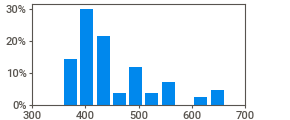
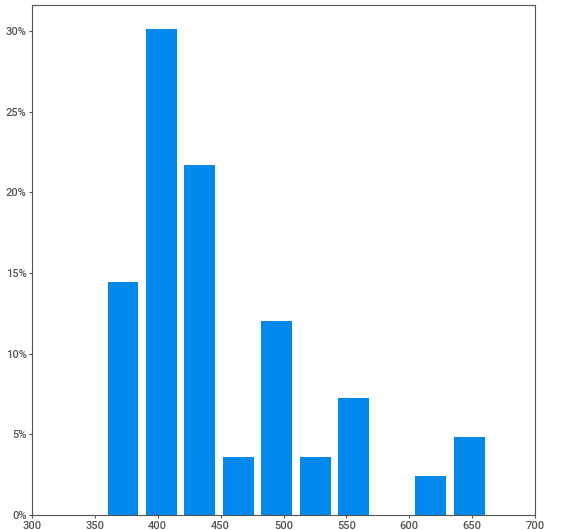
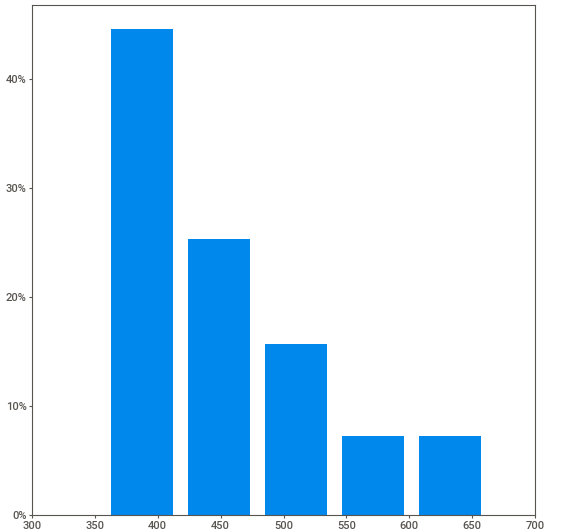
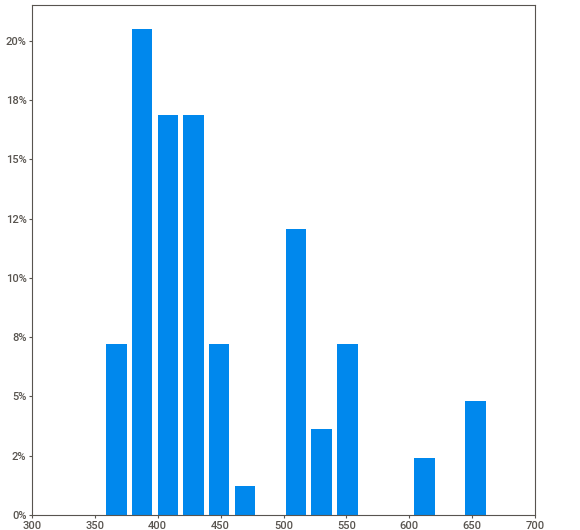
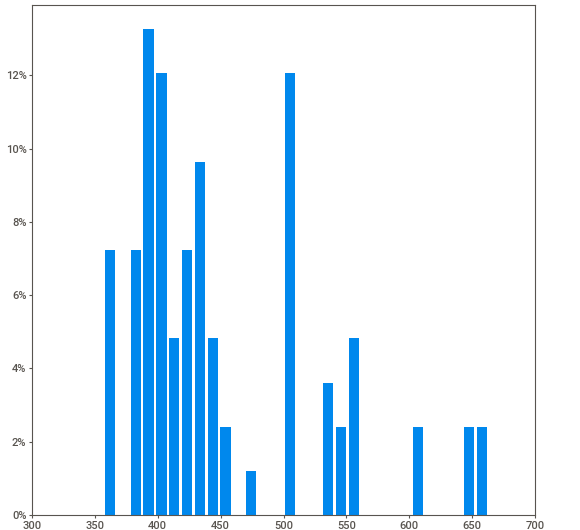
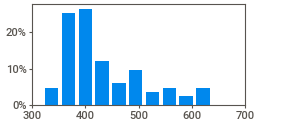
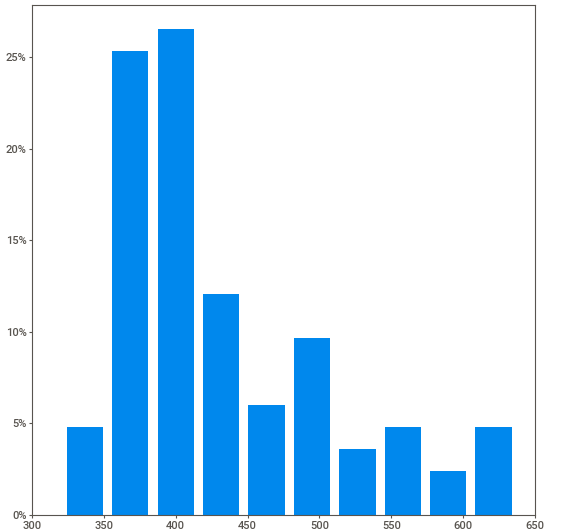
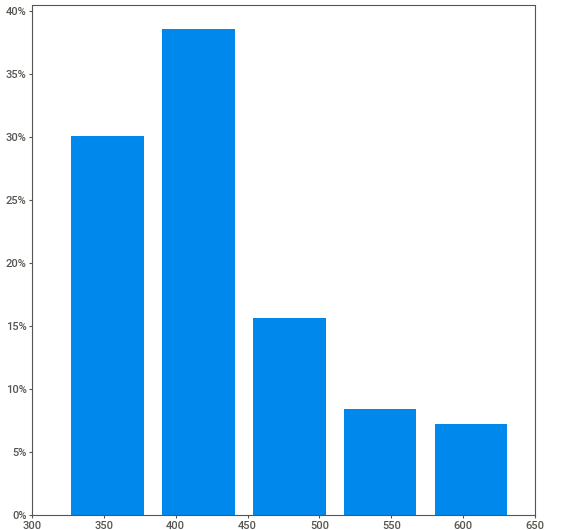
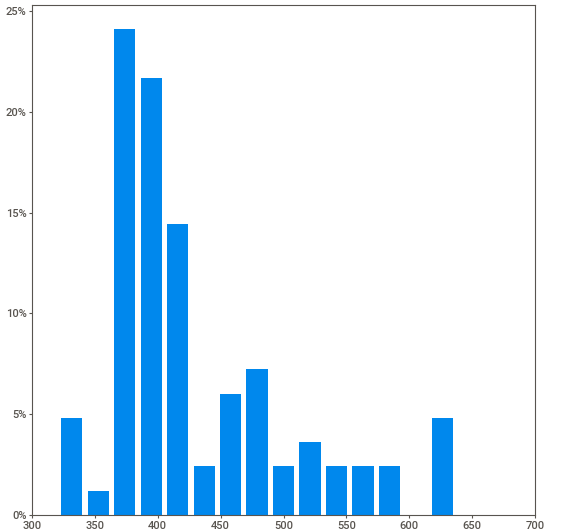
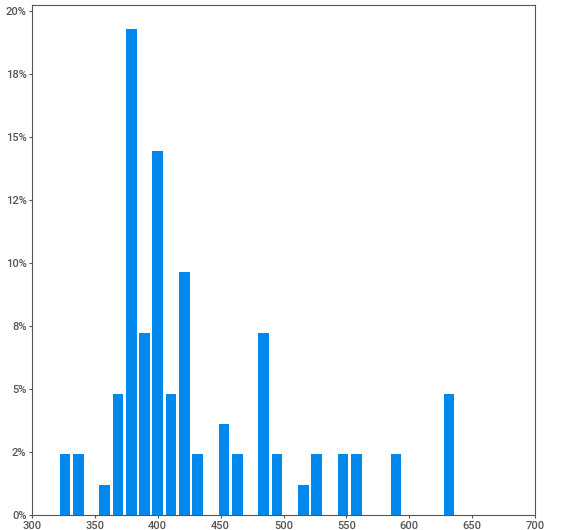
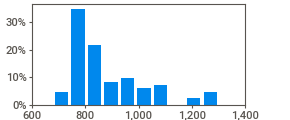
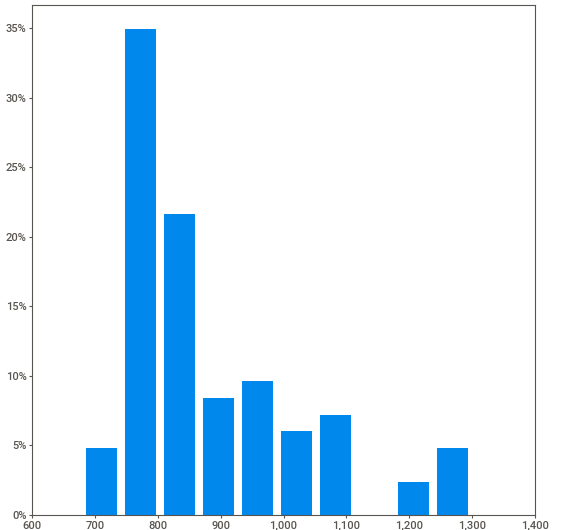
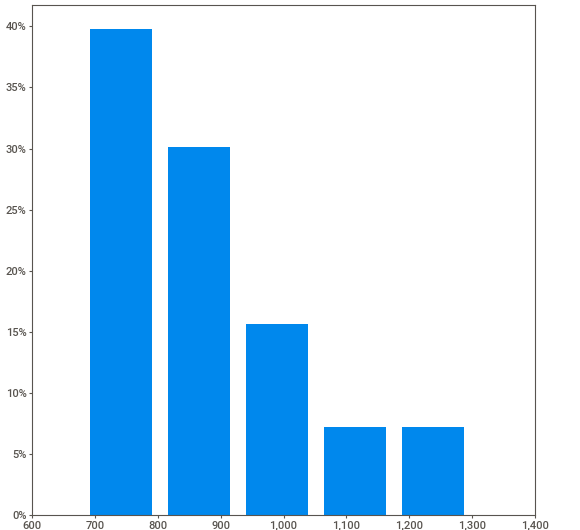
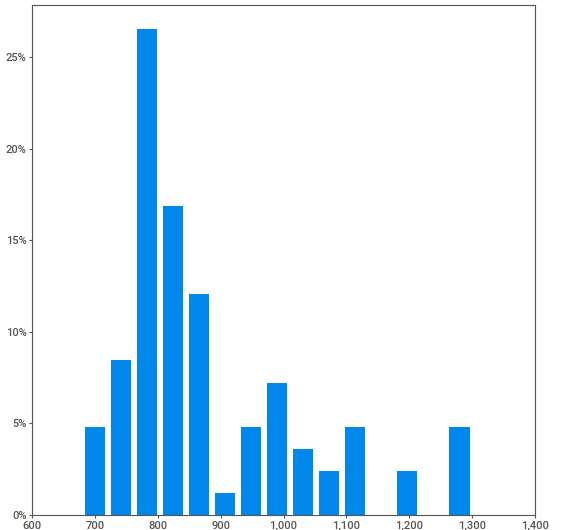
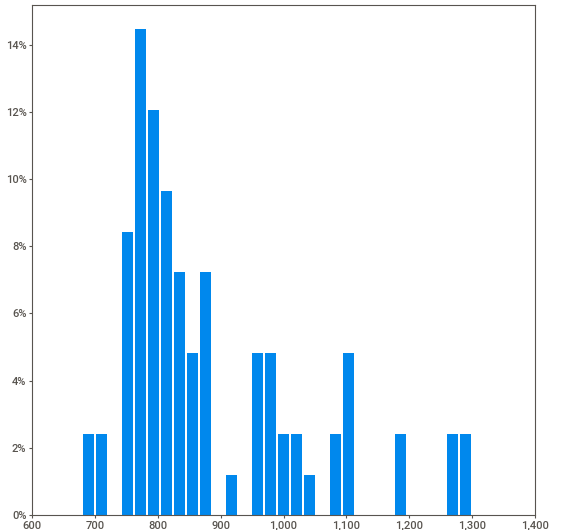
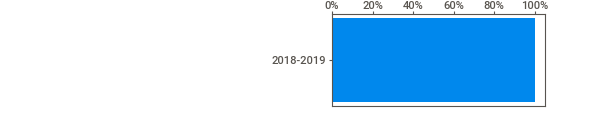
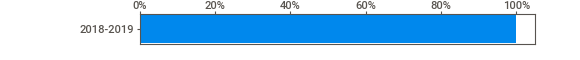
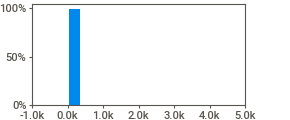
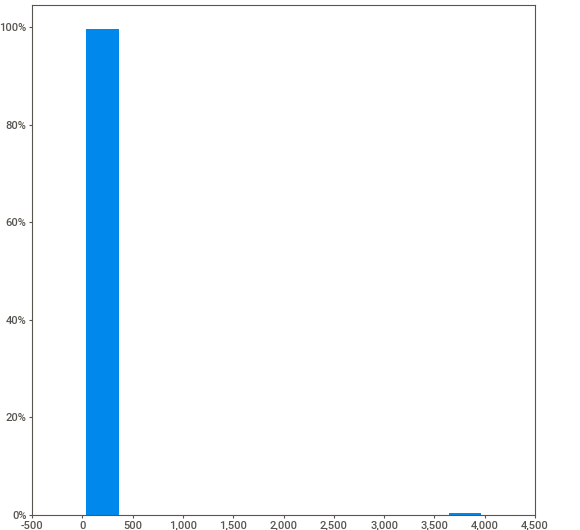
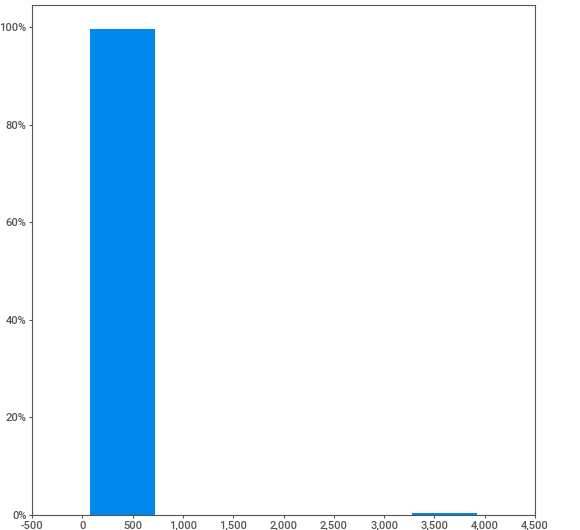
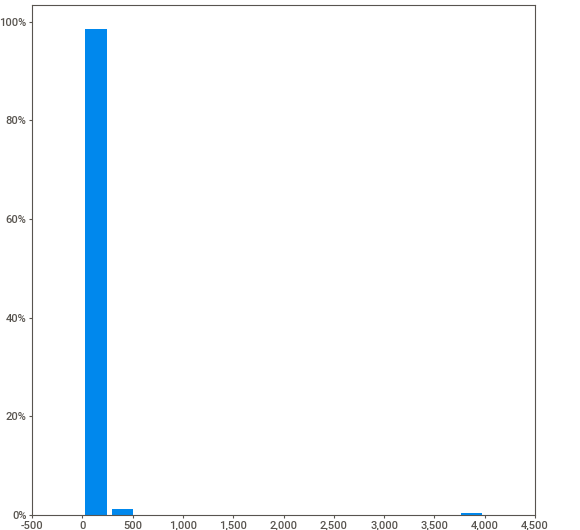
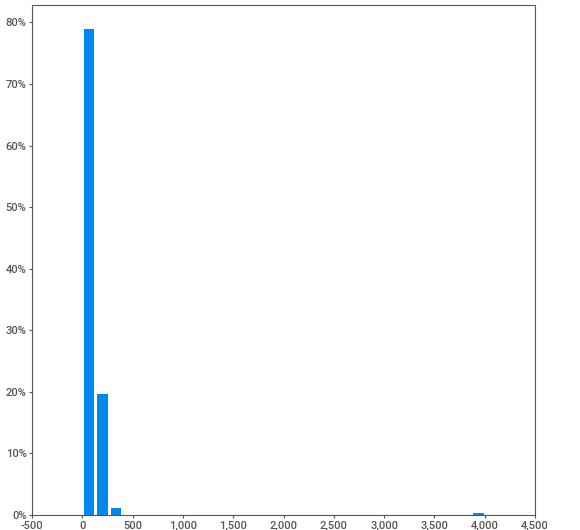
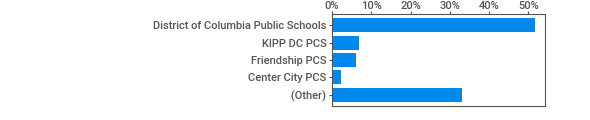
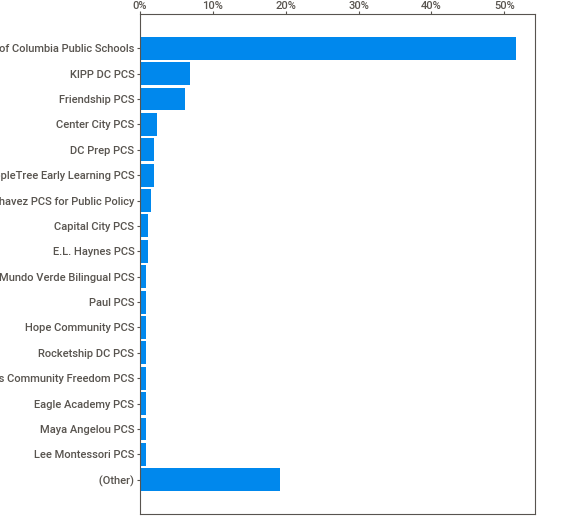
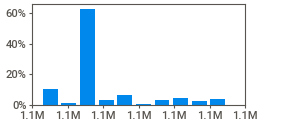
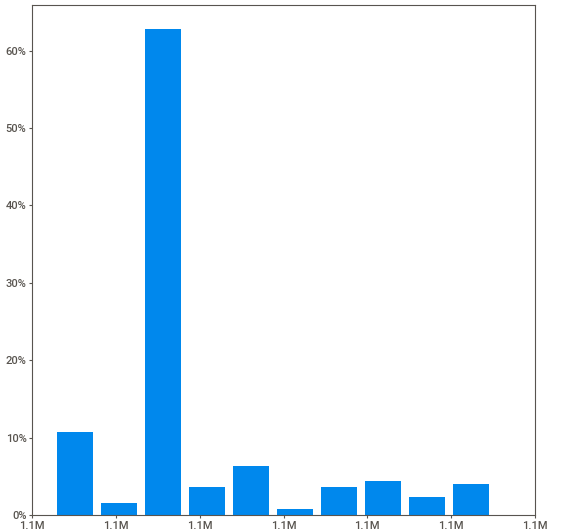
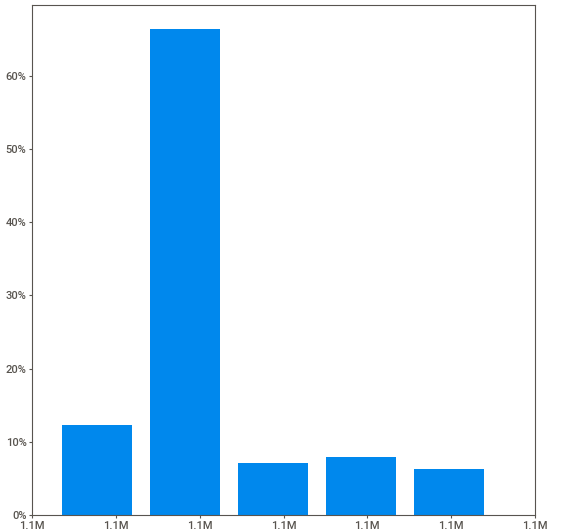
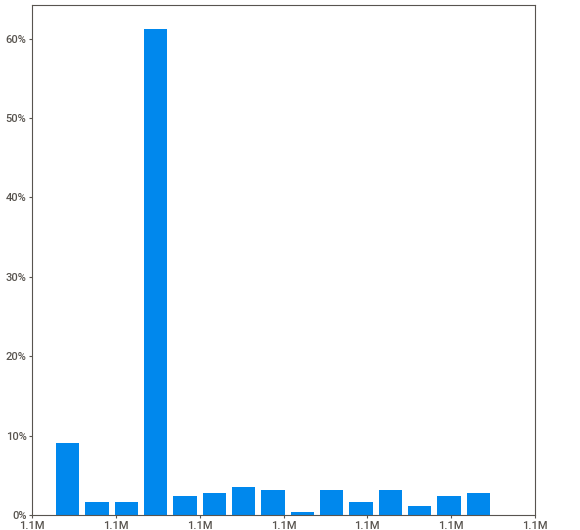
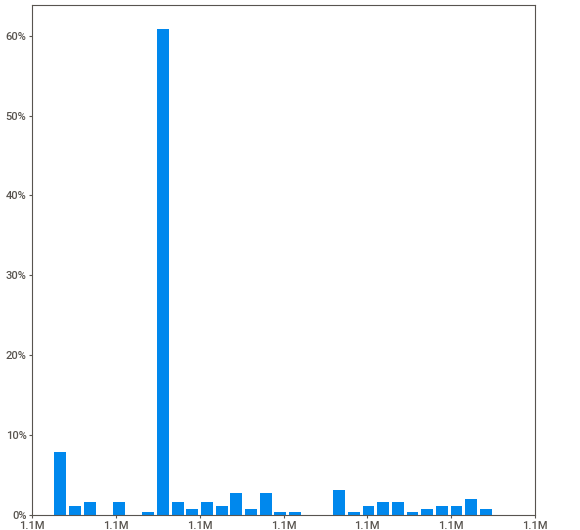
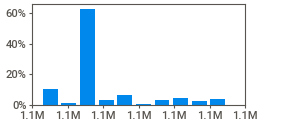
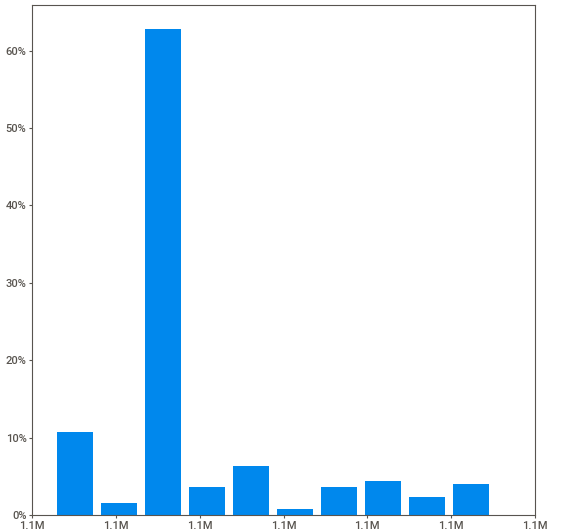
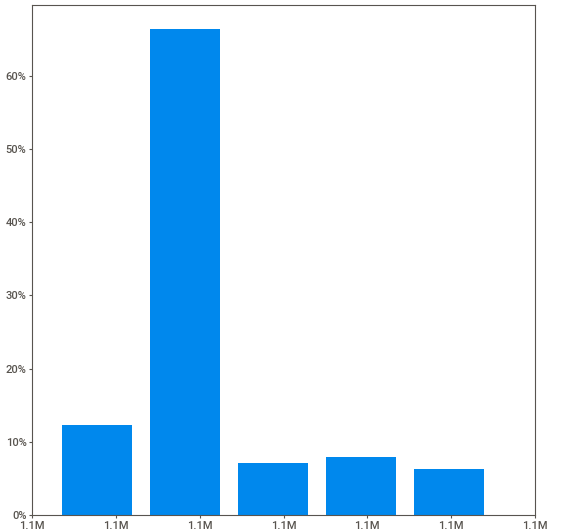
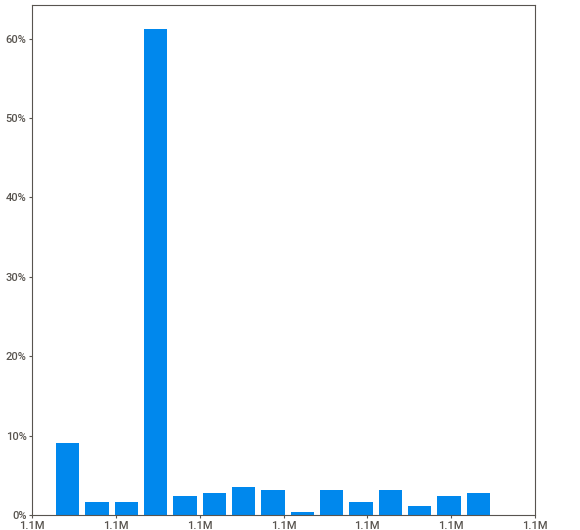
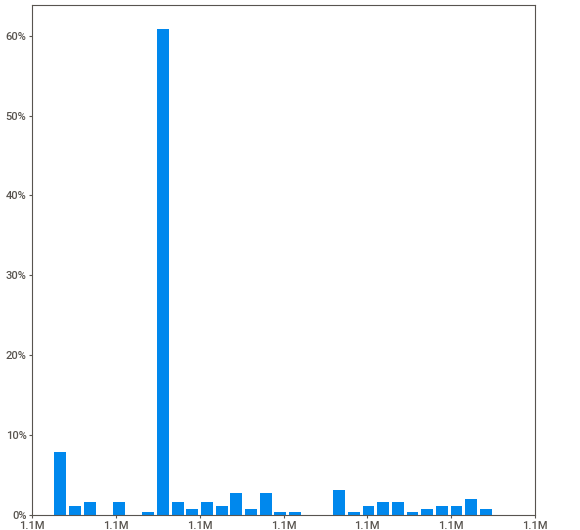
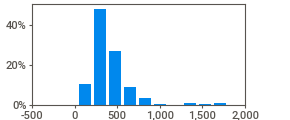
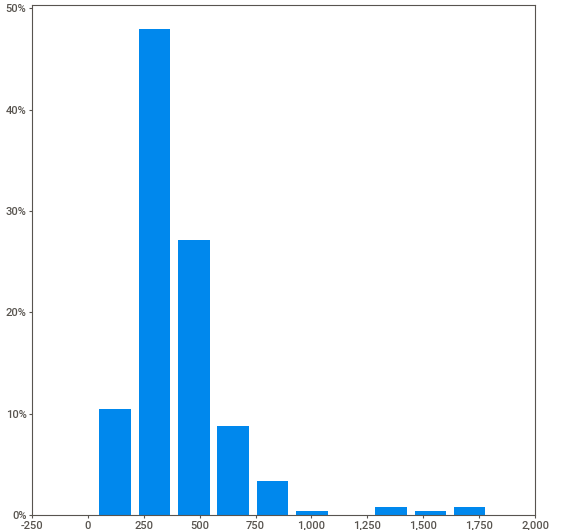
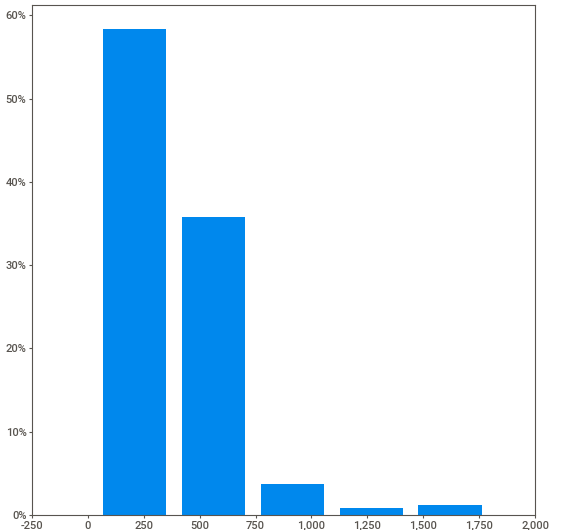
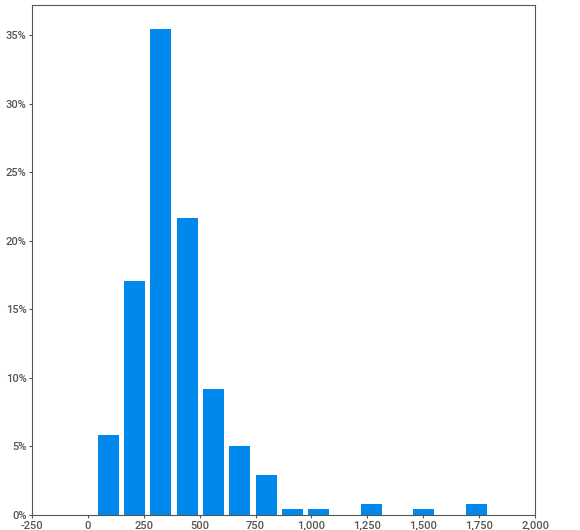
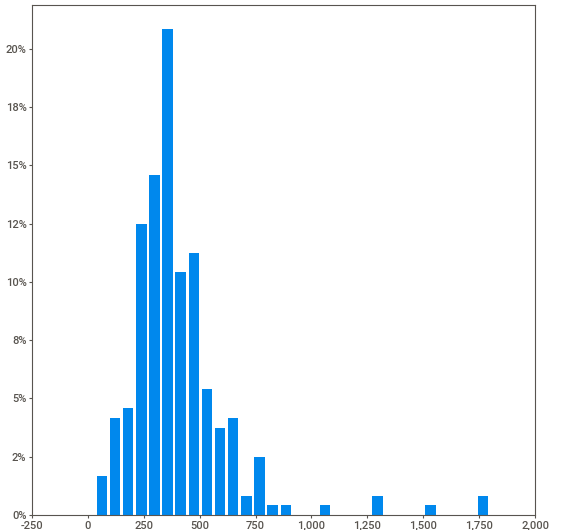
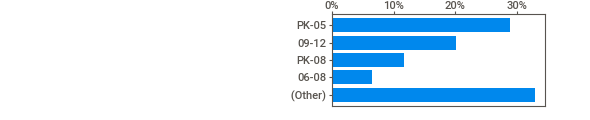
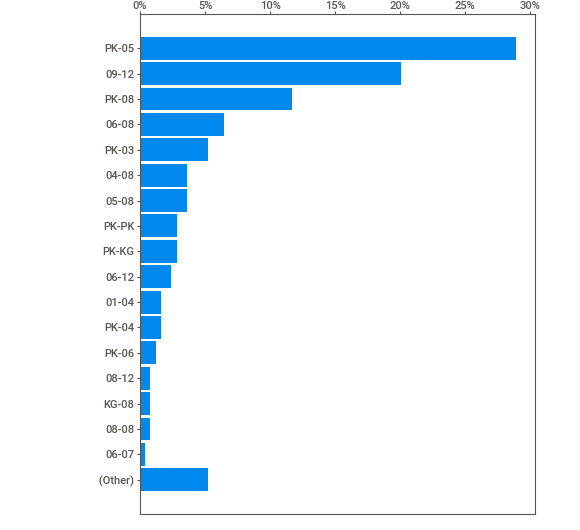
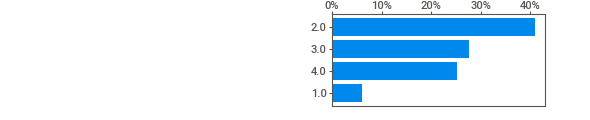
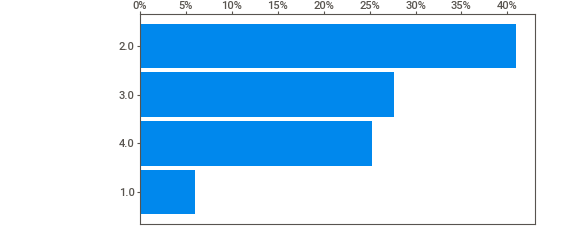
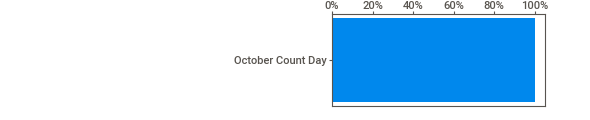
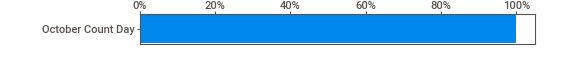
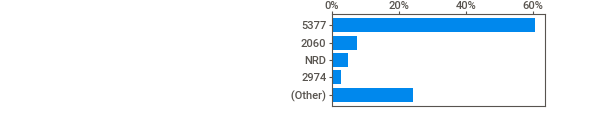
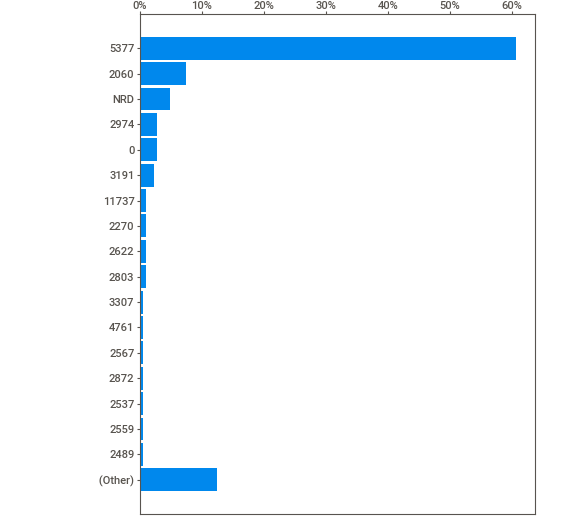
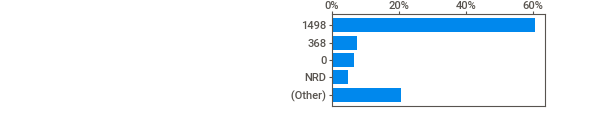
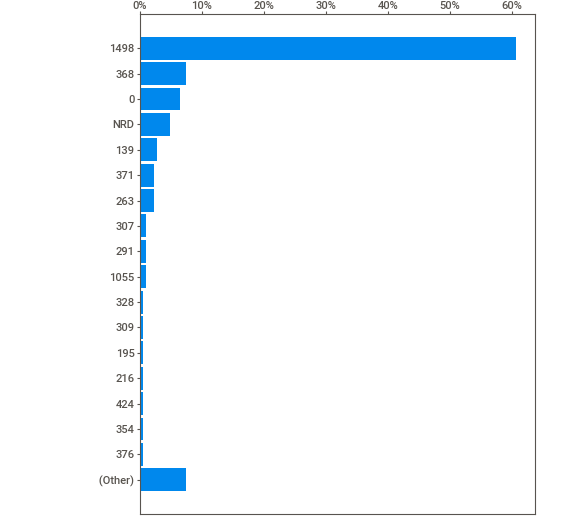
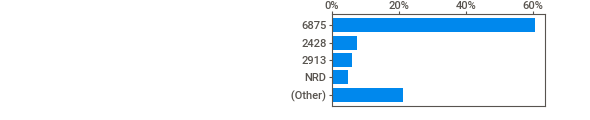
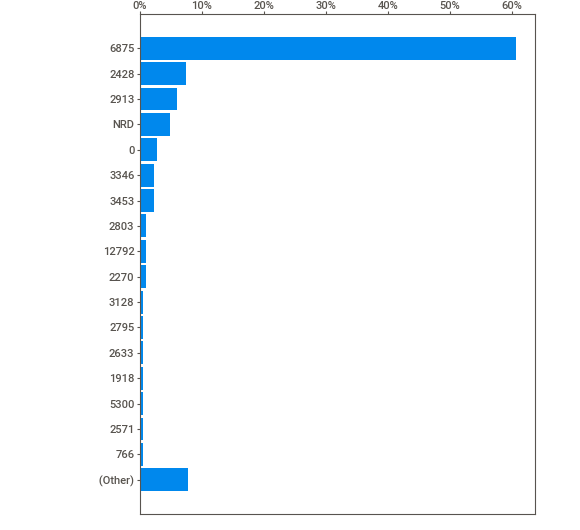
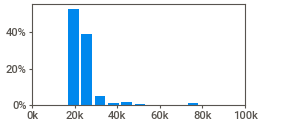
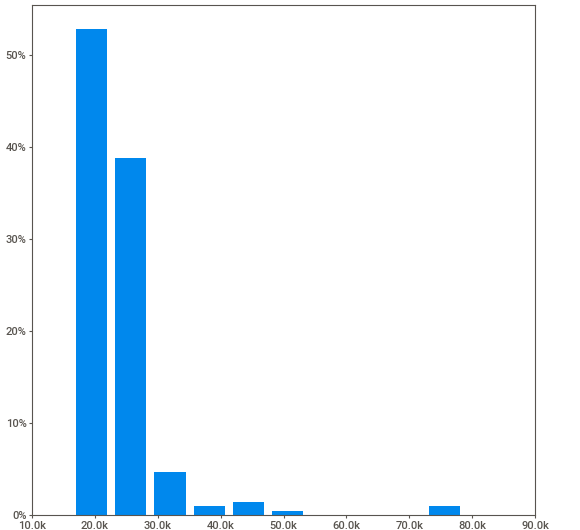
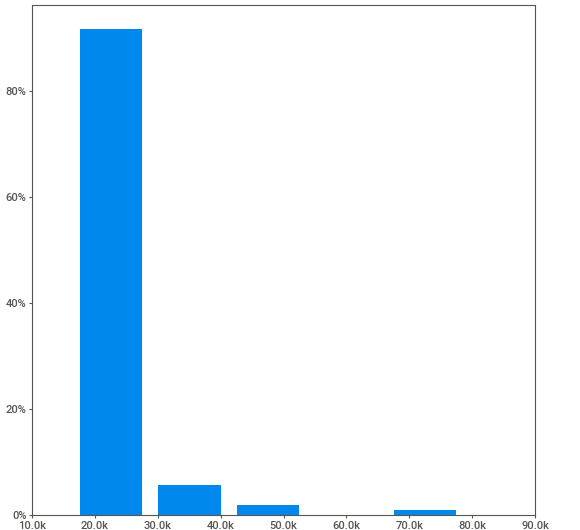
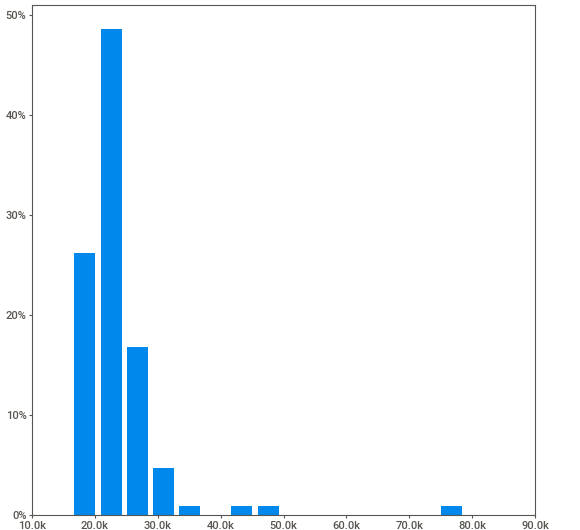
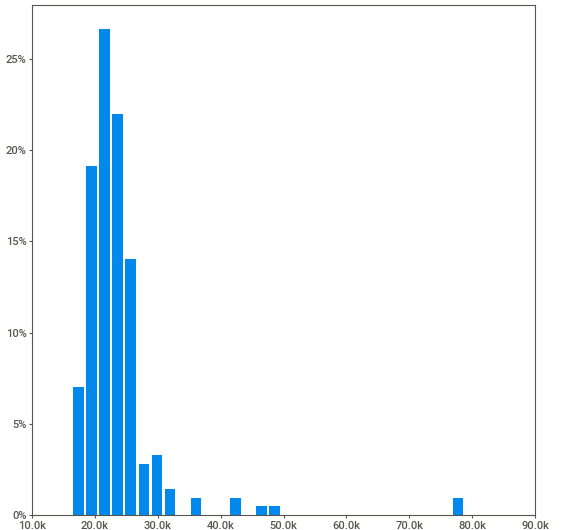
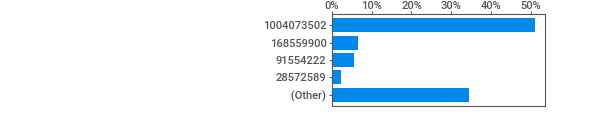
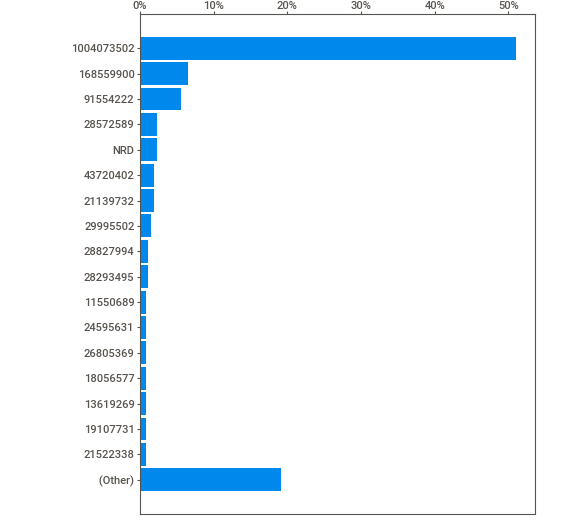
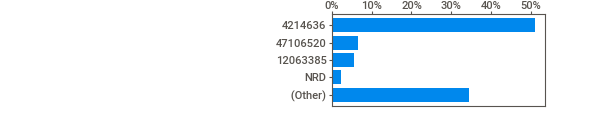
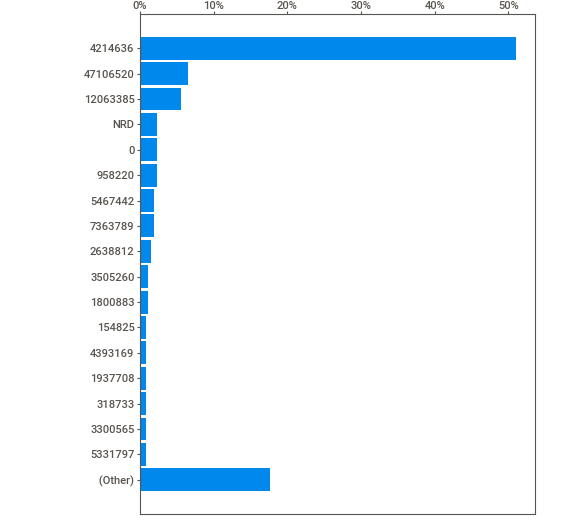
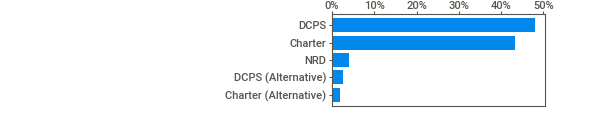
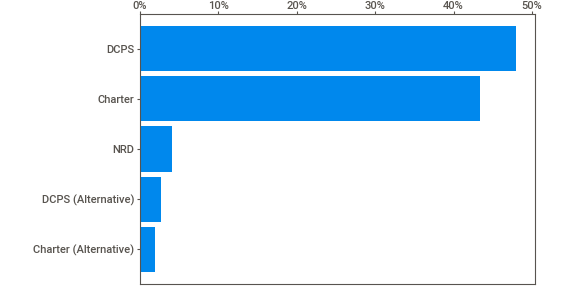
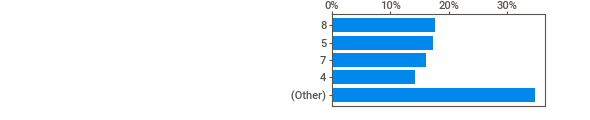
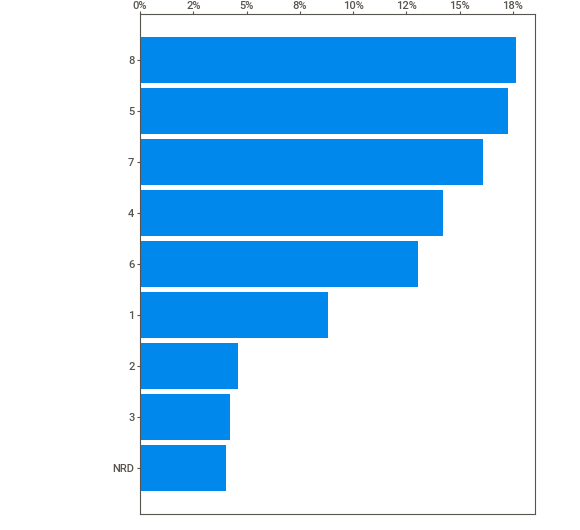
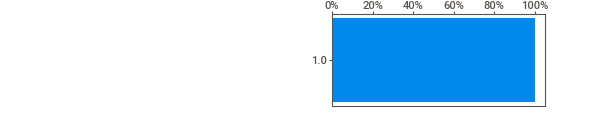
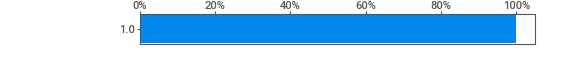
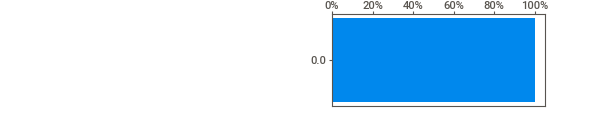
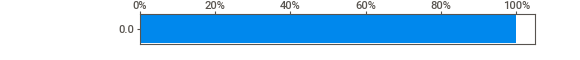
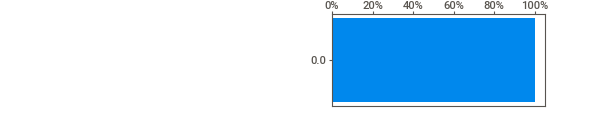
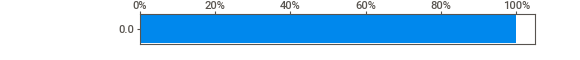
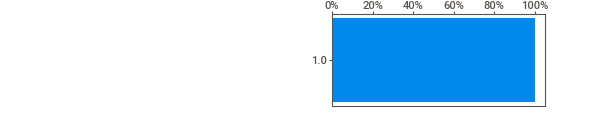
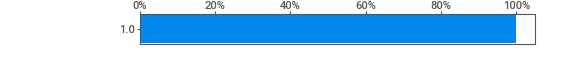
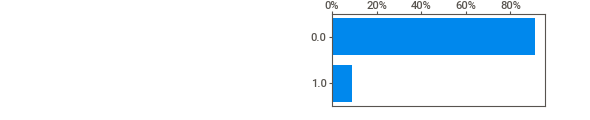
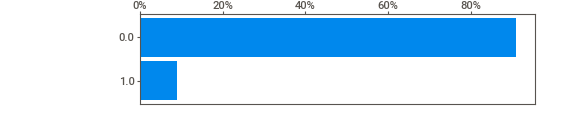
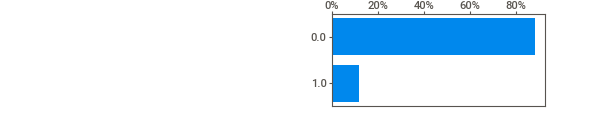
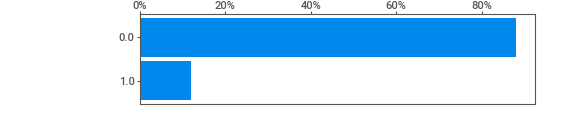
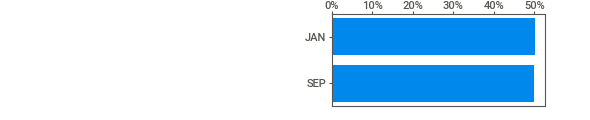
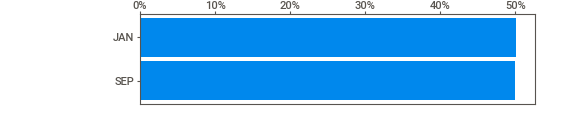
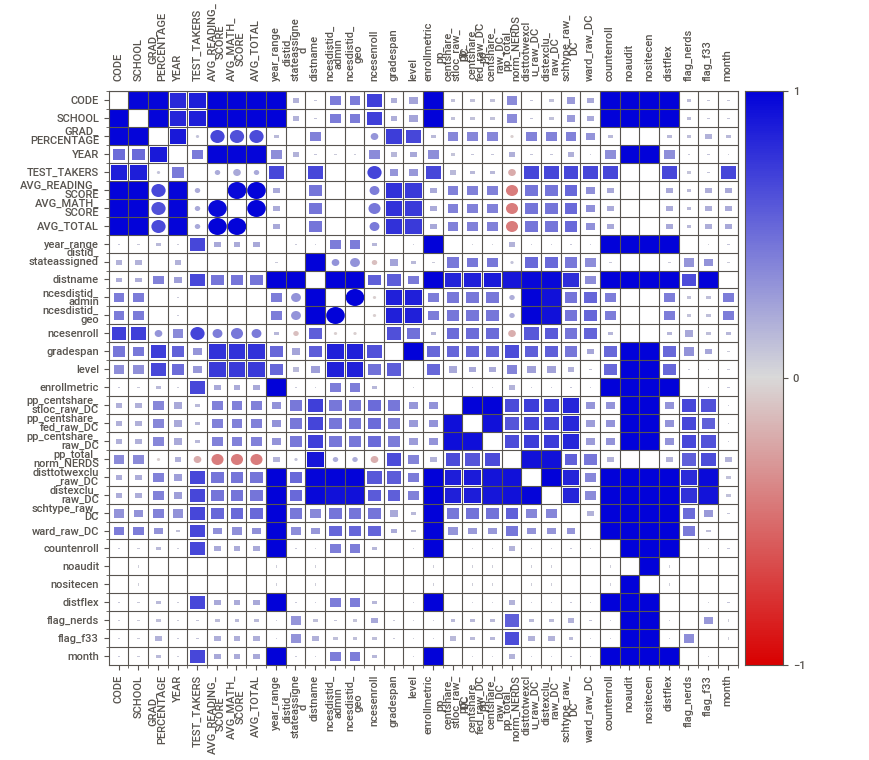
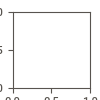

In [167]:
ana = sv.analyze(final_df)
ana.show_notebook()